In [70]:
#install and import dependencies
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://download.pytorch.org/whl/cu117


'git' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
#load Model
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\KIIT/.cache\torch\hub\master.zip
YOLOv5  2023-7-8 Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (GeForce MX330, 2048MiB)

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 14.3MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [18]:
img =  'https://images.indianexpress.com/2016/08/traffic-jam-7591.jpg'

In [19]:
results = model(img)
results.print()

image 1/1: 422x759 10 persons, 23 cars, 7 motorcycles, 1 bus
Speed: 7230.9ms pre-process, 31.4ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


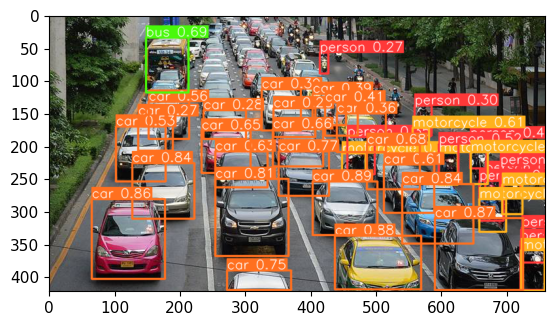

In [20]:
#to show it int he notebbok
%matplotlib inline
#imshow displays the img on screen
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

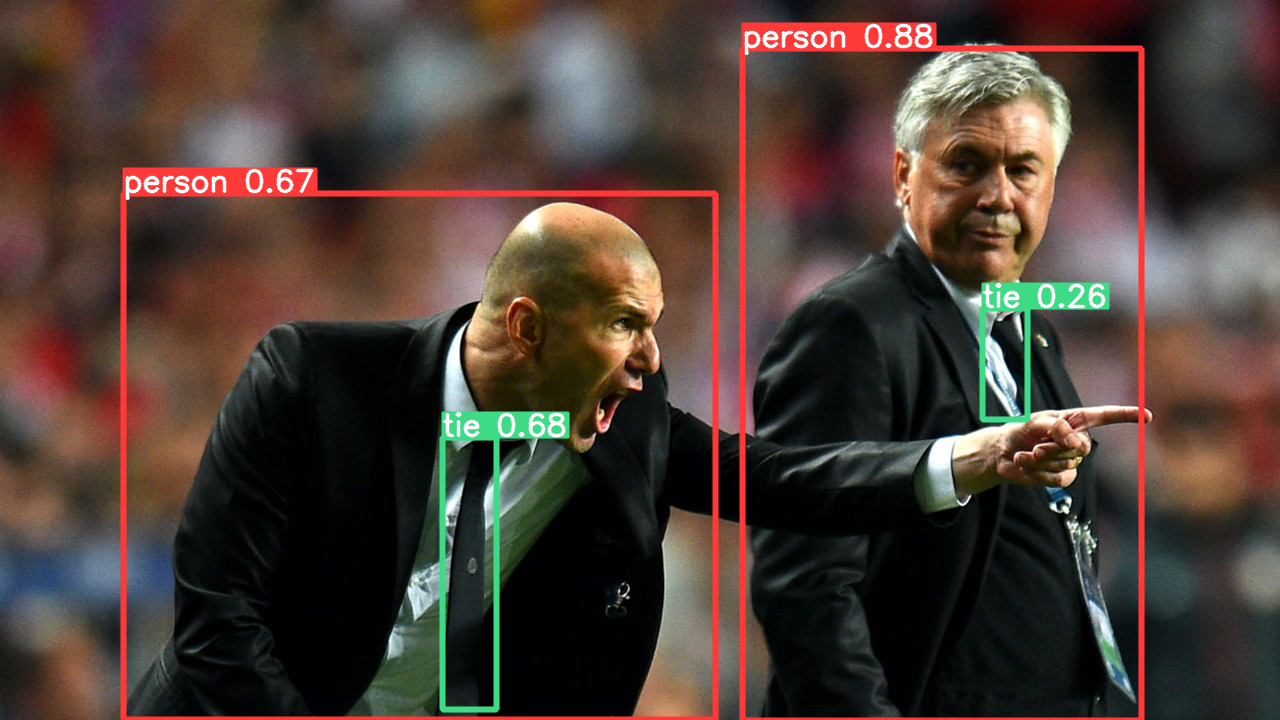

In [17]:
results.show()

In [23]:
#real time detections
#if you want ot use any other video you can add the path in videocapture
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    #make detections
    results = model(frame)
    
    cv2.imshow('Detection',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [24]:
#Train from Scratch
import uuid#unique identifier
import os
import time

In [25]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_imgs  = 20


In [29]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    #loop through images
    for img_num in range(number_imgs):
        print('collecting images for {},image numvber{}'.format(label,img_num))
        ret,frame = cap.read()
        imgname  = os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

collecting images for awake,image numvber0
collecting images for awake,image numvber1
collecting images for awake,image numvber2
collecting images for awake,image numvber3
collecting images for awake,image numvber4
collecting images for awake,image numvber5
collecting images for awake,image numvber6
collecting images for awake,image numvber7
collecting images for awake,image numvber8
collecting images for awake,image numvber9
collecting images for awake,image numvber10
collecting images for awake,image numvber11
collecting images for awake,image numvber12
collecting images for awake,image numvber13
collecting images for awake,image numvber14
collecting images for awake,image numvber15
collecting images for awake,image numvber16
collecting images for awake,image numvber17
collecting images for awake,image numvber18
collecting images for awake,image numvber19
collecting images for drowsy,image numvber0
collecting images for drowsy,image numvber1
collecting images for drowsy,image numvber

In [30]:
!git clone https://github.com/heartexlabs/labelImg

Cloning into 'labelImg'...


In [31]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB ? eta 0:00:00
     --------------------------------------- 50.1/50.1 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.9 which is incompatible.


In [33]:
!pip install PyQtWebEngine

     -------------------------------------- 182.7/182.7 kB 1.8 MB/s eta 0:00:00
     --------------------------------------- 60.0/60.0 MB 11.7 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.9 which is incompatible.
spyder 5.2.2 requires pyqtwebengine<5.13, but you have pyqtwebengine 5.15.6 which is incompatible.


In [34]:
!git clone yolov5 & pip install -r requirments.txty

fatal: repository 'yolov5' does not exist
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirments.txt'


In [39]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [40]:
!cd yolov5 & pip install -r requirements.txt

In [49]:
import torch
torch.cuda.empty_cache()

In [50]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved

In [55]:
r

71303168

In [53]:
!cd yolov5 && python train.py --img 320 --batch 5 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=5, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-193-g485da42 Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (GeForce MX330, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4

In [56]:
torch.cuda.empty_cache()


In [57]:
!cd yolov5 && python train.py --img 320 --batch 1 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=1, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-193-g485da42 Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (GeForce MX330, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

    423/499     0.206G     0.0222   0.008925    0.02035          2        320:  40%|####      | 16/40 [00:03<00:04,  5.65it/s]
    423/499     0.206G     0.0222   0.008925    0.02035          2        320:  42%|####2     | 17/40 [00:03<00:04,  5.55it/s]
    423/499     0.206G     0.0214   0.008593    0.02015          1        320:  42%|####2     | 17/40 [00:03<00:04,  5.55it/s]
    423/499     0.206G     0.0214   0.008593    0.02015          1        320:  45%|####5     | 18/40 [00:03<00:03,  5.61it/s]
    423/499     0.206G     0.0209   0.008351    0.01996          1        320:  45%|####5     | 18/40 [00:03<00:03,  5.61it/s]
    423/499     0.206G     0.0209   0

In [59]:
model = torch.hub.load('ultralytics/yolov5','custom',path = 'yolov5/runs/train/exp5/weights/last.pt',force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\KIIT/.cache\torch\hub\master.zip
YOLOv5  2023-7-11 Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (GeForce MX330, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


<function matplotlib.pyplot.show(close=None, block=None)>

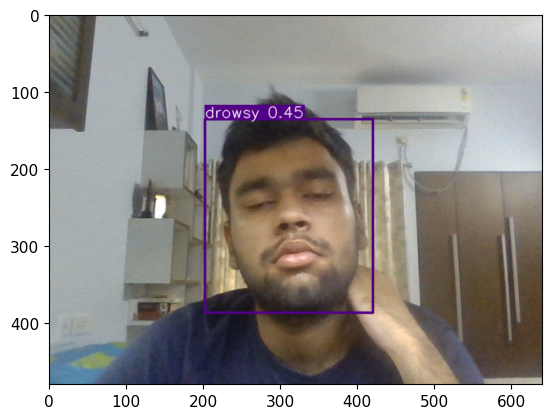

In [66]:
img = os.path.join('data','images','drowsy.f3e2f51d-1d6b-11ee-873f-c8b29bf2e5e6.jpg')
results = model(img)
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show


In [69]:
#real time detections
#if you want ot use any other video you can add the path in videocapture
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    #make detections
    results = model(frame)
    
    cv2.imshow('Detection',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()